# Projeto Gelato Mágico: Uma Jornada de Análise e Modelagem Preditiva

### **Autor:** [Mariana Ferreira Faria]
### **Data:** 06 de Outubro de 2025

## Introdução

Este notebook documenta o processo completo de desenvolvimento de um modelo de Machine Learning para prever as vendas diárias de sorvete para a sorveteria fictícia "Gelato Mágico". O objetivo é transformar dados brutos em insights acionáveis e construir um modelo preditivo de alta performance.

**Objetivo de Negócio:** Reduzir o desperdício e evitar a perda de vendas através de uma previsão de demanda mais precisa, otimizando a produção e o estoque.

**Metodologia:** A jornada foi dividida em três fases principais:
1.  **Análise Exploratória de Dados (EDA):** Entender profundamente os dados e as relações entre as variáveis.
2.  **Modelagem e Otimização:** Construir, avaliar e iterar sobre diferentes modelos e conjuntos de features para encontrar a melhor solução.
3.  **Conclusão:** Resumir os resultados e os insights de negócio gerados pelo modelo final.

In [20]:
## Configuração Inicial e Imports

# Imports para manipulação de dados e visualização
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Imports para modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import da nossa função de feature engineering
from src.features.build_features import criar_features_de_data

# Garante que os caminhos de arquivos funcionem corretamente
# (Este comando mágico só funciona no Jupyter)
if os.path.basename(os.getcwd()) == 'notebooks':
    %cd ..

print("Ambiente configurado. Diretório de trabalho:", os.getcwd())

Ambiente configurado. Diretório de trabalho: C:\Users\ffari\gelato-magico-predict


## Fase 1: Análise Exploratória de Dados (EDA)

Nesta fase, carregamos nosso dataset realista e investigamos as principais relações que governam as vendas de sorvete.

In [21]:
# Carregamento e Preparação dos Dados

# Carregar o dataset gerado
df = pd.read_csv('data/raw/dados_sorveteria.csv')

# Aplicar a função para criar features de data
df = criar_features_de_data(df)

# Visualizar as primeiras linhas e informações básicas
print("Amostra dos Dados:")
display(df.head())

print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas Descritivas:")
display(df.describe())

Features 'Mes' e 'Dia_da_Semana' criadas/atualizadas.
Amostra dos Dados:


,Data,Temperatura_C,Precipitacao_mm,Feriado,Ferias_Escolares,Vendas_Sorvete,Mes,Dia_da_Semana
0,2023-01-01,35.1,36.7,1,1,379,1,6
1,2023-01-02,31.0,1.3,0,1,319,1,0
2,2023-01-03,36.4,0.0,0,1,427,1,1
3,2023-01-04,32.7,0.0,0,1,386,1,2
4,2023-01-05,35.8,0.0,0,1,408,1,3



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data              365 non-null    datetime64[ns]
 1   Temperatura_C     365 non-null    float64       
 2   Precipitacao_mm   365 non-null    float64       
 3   Feriado           365 non-null    int64         
 4   Ferias_Escolares  365 non-null    int64         
 5   Vendas_Sorvete    365 non-null    int64         
 6   Mes               365 non-null    int32         
 7   Dia_da_Semana     365 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3)
memory usage: 20.1 KB

Estatísticas Descritivas:


,Data,Temperatura_C,Precipitacao_mm,Feriado,Ferias_Escolares,Vendas_Sorvete,Mes,Dia_da_Semana
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2023-07-02 00:00:00,25.388219,7.859178,0.032877,0.172603,211.517808,6.526027,3.008219
min,2023-01-01 00:00:00,15.100000,0.000000,0.000000,0.000000,21.000000,1.000000,0.000000
25%,2023-04-02 00:00:00,21.500000,0.000000,0.000000,0.000000,143.000000,4.000000,1.000000
50%,2023-07-02 00:00:00,25.000000,0.000000,0.000000,0.000000,204.000000,7.000000,3.000000
75%,2023-10-01 00:00:00,29.100000,9.000000,0.000000,0.000000,272.000000,10.000000,5.000000
max,2023-12-31 00:00:00,38.000000,49.800000,1.000000,1.000000,556.000000,12.000000,6.000000
std,NaN,5.187649,13.851943,0.178559,0.378422,93.490952,3.452584,2.006155


### Análise da Variável Alvo (`Vendas_Sorvete`) e Outliers

Antes de analisar as relações, vamos entender a nossa variável alvo. O histograma mostra a distribuição das vendas diárias, e o box plot nos ajuda a identificar a faixa de vendas mais comum e a presença de dias com vendas excepcionalmente altas (outliers).

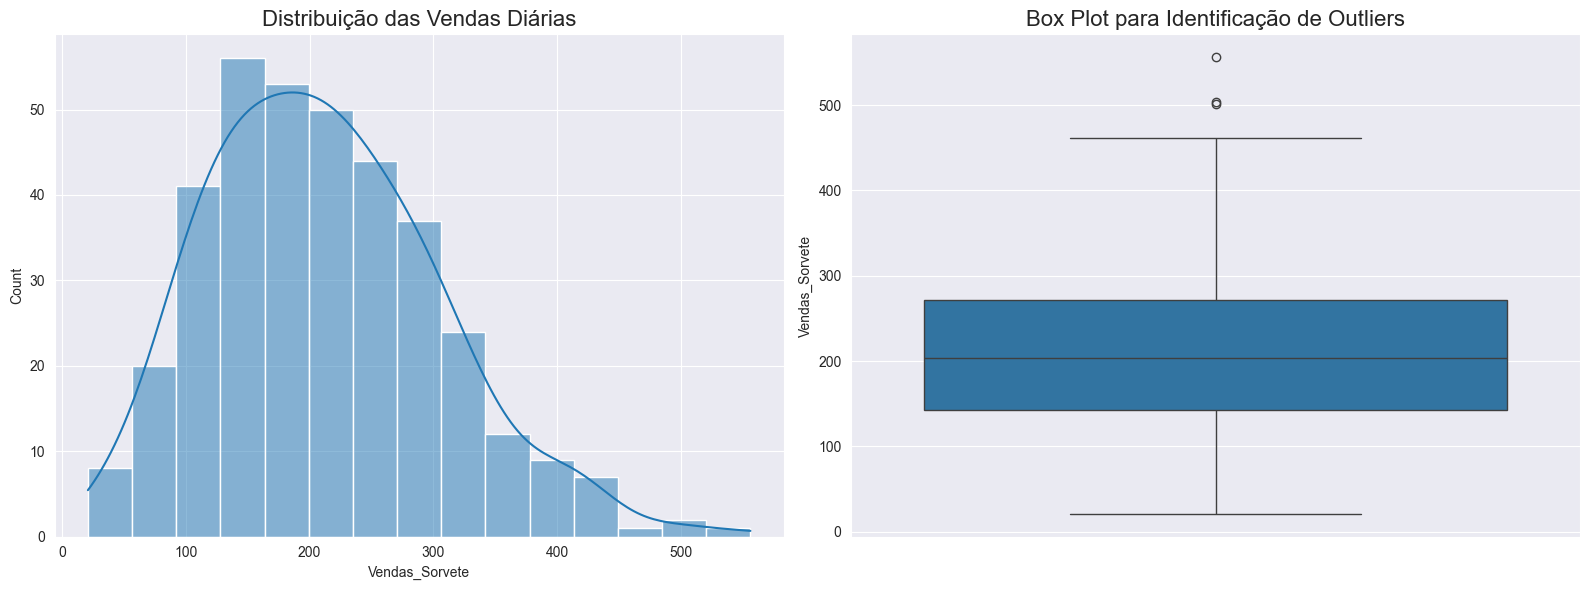

In [32]:
# Análise Univariada da Variável Alvo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma
sns.histplot(df['Vendas_Sorvete'], kde=True, ax=axes[0])
axes[0].set_title('Distribuição das Vendas Diárias', fontsize=16)

# Box Plot
sns.boxplot(y=df['Vendas_Sorvete'], ax=axes[1])
axes[1].set_title('Box Plot para Identificação de Outliers', fontsize=16)

plt.tight_layout()
plt.show()

### Distribuição das Features de Clima

Agora, vamos analisar as features de entrada mais importantes: a temperatura e a precipitação.

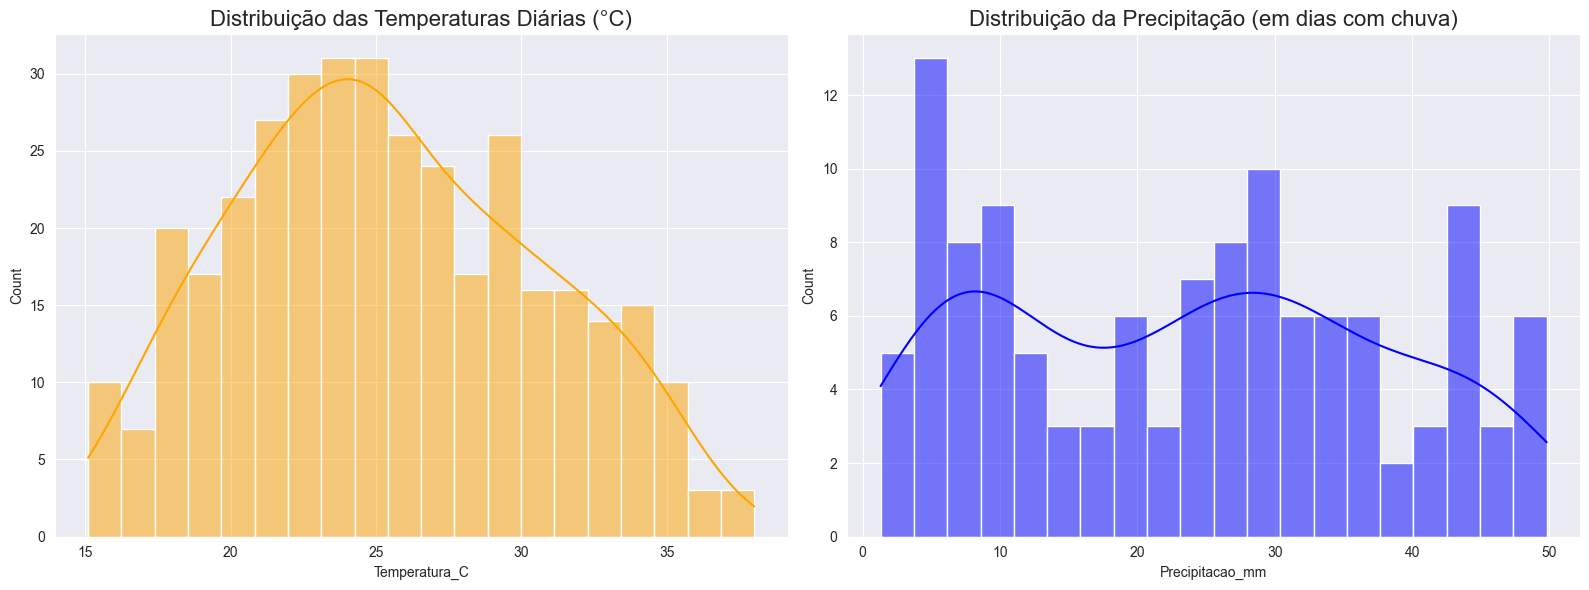

In [22]:
#Análise Univariada das Features Numéricas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para Temperatura
sns.histplot(df['Temperatura_C'], kde=True, ax=axes[0], color='orange', bins=20)
axes[0].set_title('Distribuição das Temperaturas Diárias (°C)', fontsize=16)

# Histograma para Precipitação (apenas em dias que choveu)
sns.histplot(df[df['Precipitacao_mm'] > 0]['Precipitacao_mm'], kde=True, ax=axes[1], color='blue', bins=20)
axes[1].set_title('Distribuição da Precipitação (em dias com chuva)', fontsize=16)

plt.tight_layout()
plt.show()

### Impacto de Eventos (Feriados e Férias)

Vamos visualizar o impacto direto que feriados e férias escolares têm sobre as vendas.

C:\Users\ffari\AppData\Local\Temp\ipykernel_14360\2601287308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Feriado', y='Vendas_Sorvete', data=df, ax=axes[0], palette='pastel')
C:\Users\ffari\AppData\Local\Temp\ipykernel_14360\2601287308.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Dia Normal', 'Feriado'])
C:\Users\ffari\AppData\Local\Temp\ipykernel_14360\2601287308.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ferias_Escolares', y='Vendas_Sorvete', data=df, ax=axes[1], palette='pastel')
C:\Users\ffari\AppData\Local\Temp\ipykernel_14360\2601287308.py:12: Us

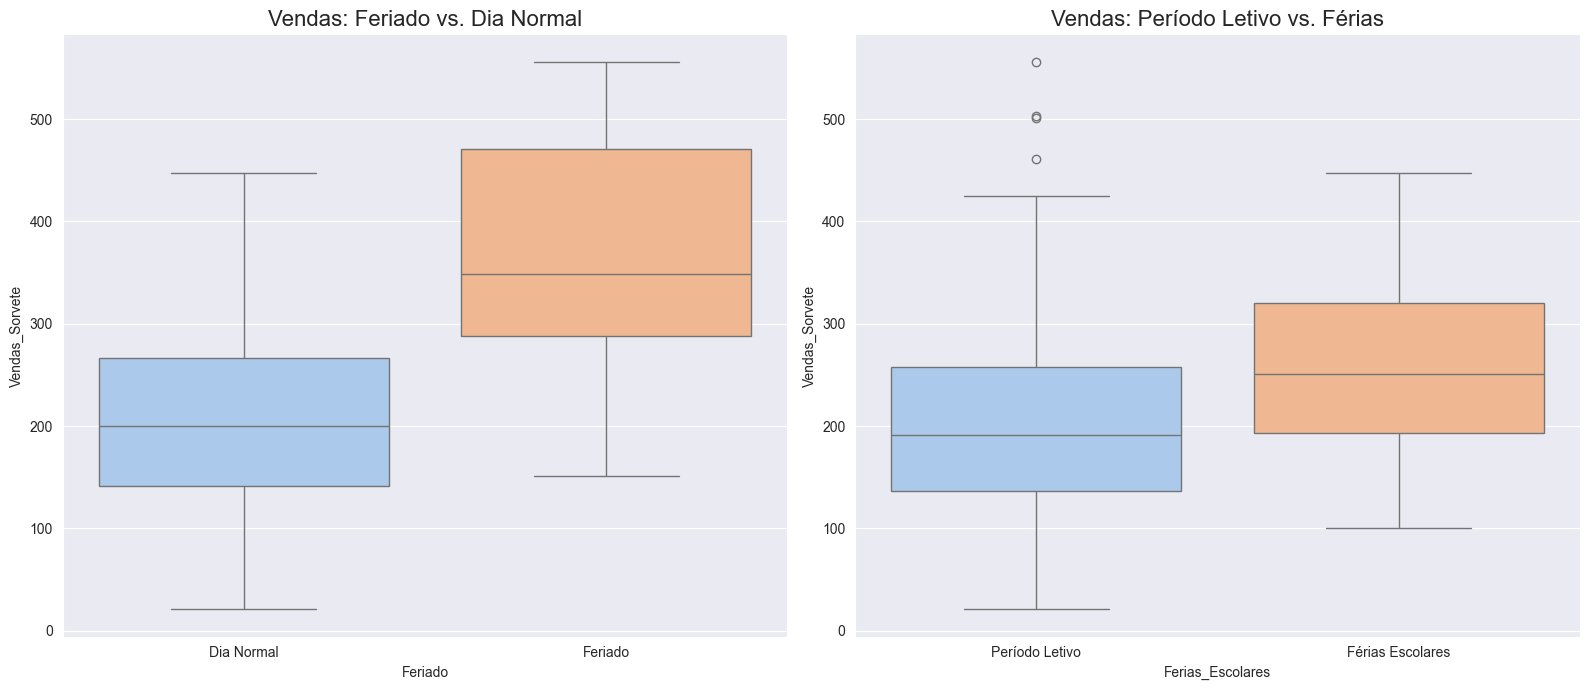

In [23]:
# Análise Bivariada das Features Categóricas
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Boxplot para Feriado
sns.boxplot(x='Feriado', y='Vendas_Sorvete', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Vendas: Feriado vs. Dia Normal', fontsize=16)
axes[0].set_xticklabels(['Dia Normal', 'Feriado'])

# Boxplot para Férias Escolares
sns.boxplot(x='Ferias_Escolares', y='Vendas_Sorvete', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Vendas: Período Letivo vs. Férias', fontsize=16)
axes[1].set_xticklabels(['Período Letivo', 'Férias Escolares'])

plt.tight_layout()
plt.show()

### Distribuição das Features de Clima

Agora, vamos analisar as features de entrada mais importantes: a temperatura e a precipitação.

C:\Users\ffari\AppData\Local\Temp\ipykernel_14360\1306310144.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dia_da_Semana_Nome', y='Vendas_Sorvete', data=df, order=dias_semana_map.values(), palette='crest')


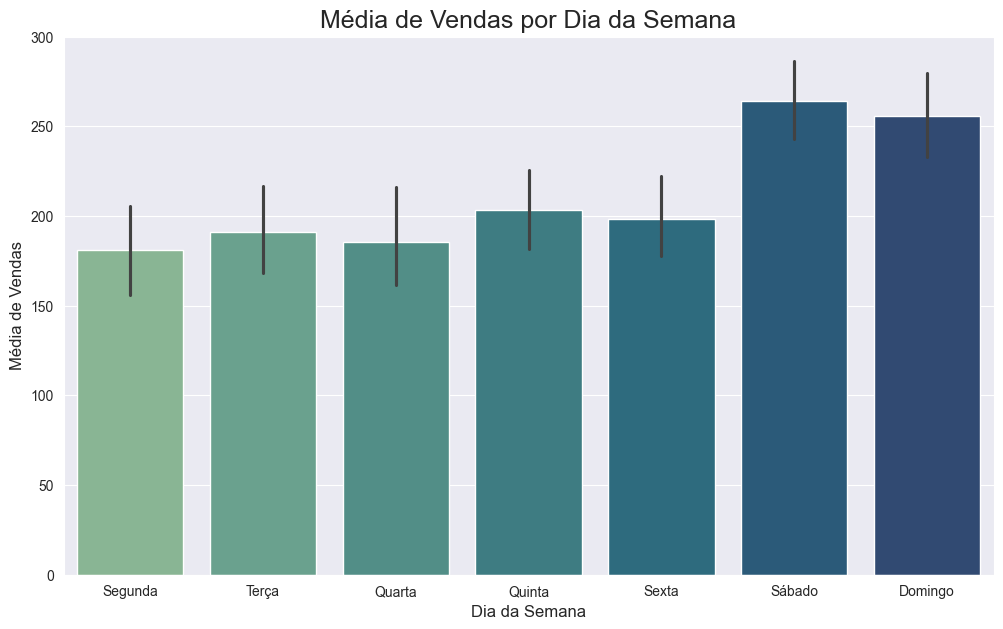

In [24]:
# Gráfico - Média de Vendas por Dia da Semana

dias_semana_map = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
df['Dia_da_Semana_Nome'] = df['Dia_da_Semana'].map(dias_semana_map)

plt.figure(figsize=(12, 7))
sns.barplot(x='Dia_da_Semana_Nome', y='Vendas_Sorvete', data=df, order=dias_semana_map.values(), palette='crest')
plt.title('Média de Vendas por Dia da Semana', fontsize=18)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.show()

**Insight 1:** O gráfico confirma um padrão semanal claro, com vendas estáveis durante a semana e um pico significativo no Sábado e Domingo. O fim de semana é crucial para o faturamento.

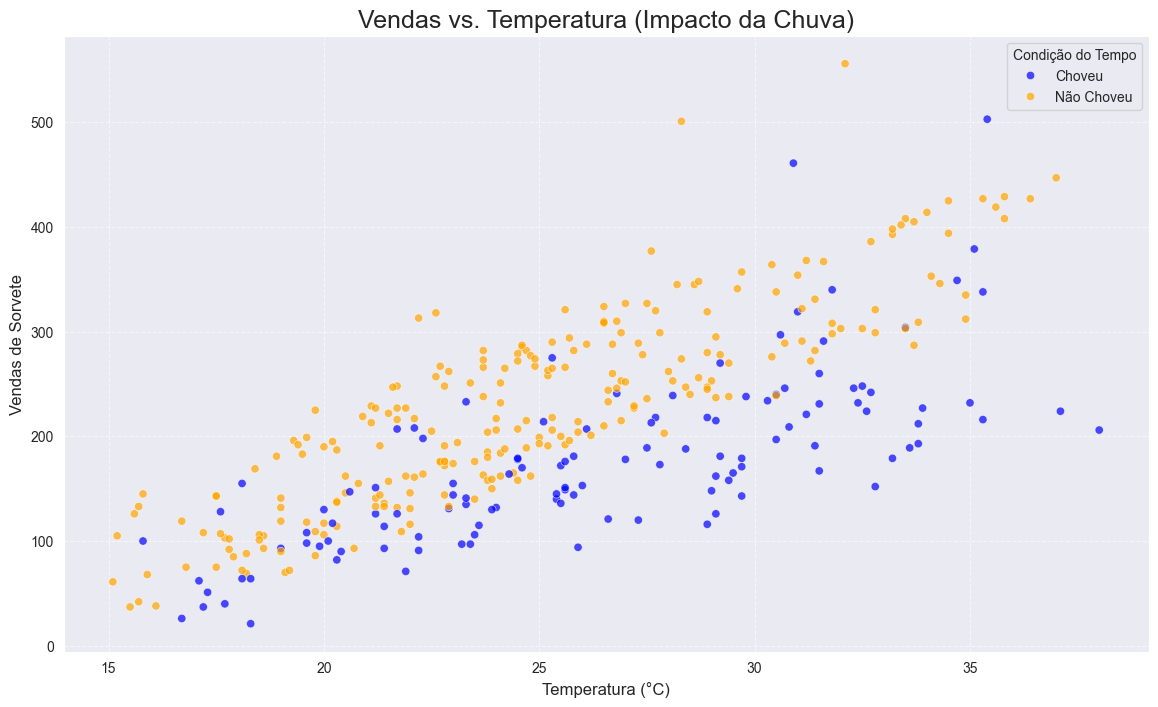

In [25]:
# Gráfico - Vendas vs. Temperatura e o Impacto da Chuva

df['Choveu_Sim_Nao'] = df['Precipitacao_mm'].apply(lambda x: 'Choveu' if x > 1 else 'Não Choveu')

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Temperatura_C', y='Vendas_Sorvete', hue='Choveu_Sim_Nao', palette={'Choveu': 'blue', 'Não Choveu': 'orange'}, alpha=0.7)
plt.title('Vendas vs. Temperatura (Impacto da Chuva)', fontsize=18)
plt.xlabel('Temperatura (°C)', fontsize=12)
plt.ylabel('Vendas de Sorvete', fontsize=12)
plt.legend(title='Condição do Tempo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Insight 2:** A temperatura é um forte indicador de vendas, mas a chuva tem um poder de veto. O gráfico mostra claramente que, para uma mesma temperatura, as vendas são sistematicamente menores em dias de chuva.

### Análise de Correlação entre as Variáveis

Para finalizar a análise exploratória, vamos gerar uma matriz de correlação. Este heatmap nos permite visualizar rapidamente a força e a direção da relação linear entre todas as variáveis do nosso dataset. As cores quentes (vermelho) indicam uma correlação positiva, enquanto as cores frias (azul) indicam uma correlação negativa.

Calculando a matriz de correlação...
Gerando o heatmap...


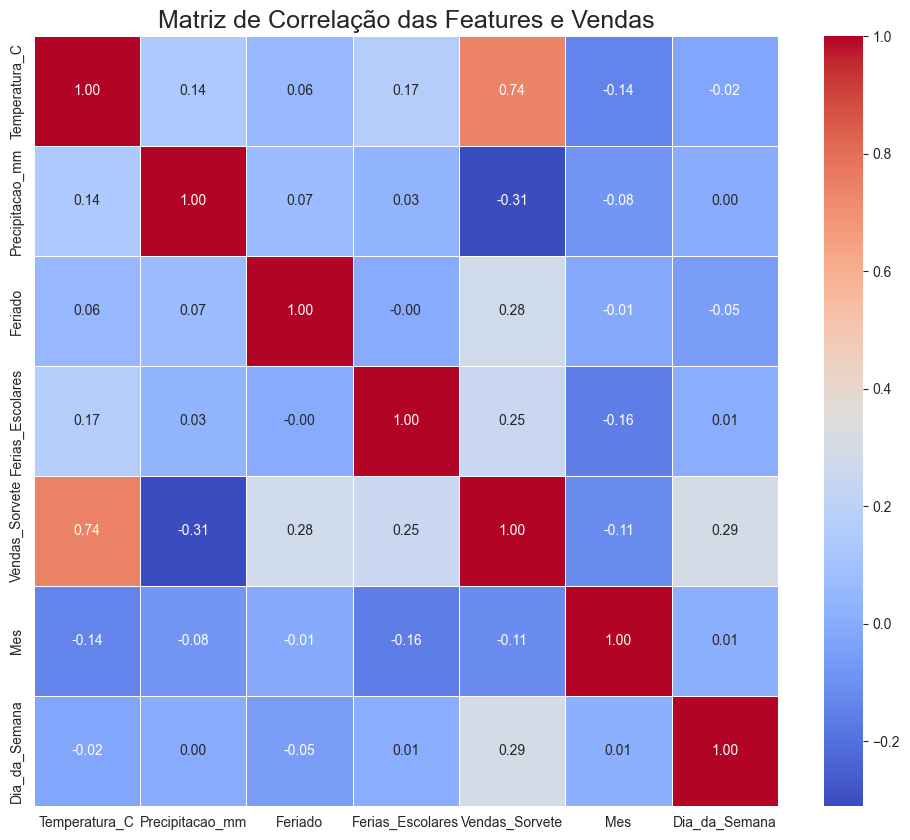

In [26]:
# CÉLULA: Matriz de Correlação e Heatmap

print("Calculando a matriz de correlação...")

# Vamos remover as colunas de texto que criamos para os gráficos antes de calcular
numeric_df = df.drop(['Data', 'Dia_da_Semana_Nome', 'Choveu_Sim_Nao'], axis=1)

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Gerar o heatmap para visualização
print("Gerando o heatmap...")
plt.figure(figsize=(12, 10))

sns.heatmap(
    correlation_matrix,
    annot=True,          # Mostra os números dentro de cada quadrado
    cmap='coolwarm',     # Esquema de cores: azul (negativo), vermelho (positivo)
    fmt='.2f',           # Formata os números para duas casas decimais
    linewidths=.5        # Adiciona uma pequena linha entre os quadrados
)

plt.title('Matriz de Correlação das Features e Vendas', fontsize=18)
plt.show()

**Insight da Correlação:** O heatmap confirma visualmente nossas principais hipóteses:
1.  **`Vendas_Sorvete`** tem uma forte correlação positiva com a **`Temperatura_C` (0.74)** e uma correlação negativa moderada com a **`Precipitacao_mm` (-0.31)**.
2.  **`Feriado` (0.28)** e **`Dia_da_Semana` (0.29)** também mostram uma correlação positiva com as vendas.
3.  **Prova da Redundância:** A feature **`Mes`** mostra uma correlação muito fraca com as **`Vendas_Sorvete` (-0.11)**. Isso reforça a decisão tomada na fase de otimização de remover esta feature do modelo final, pois a `Temperatura_C` já captura a sazonalidade de forma muito mais eficaz.

## Fase 2: A Jornada de Modelagem

Com os insights da EDA, iniciamos o processo de construção e otimização do nosso modelo preditivo. Registramos cada experimento com MLflow para garantir a reprodutibilidade e comparação.

In [27]:
# Preparação dos Dados para Modelagem

# Definindo as features iniciais e o alvo
features_completas = ['Temperatura_C', 'Precipitacao_mm', 'Feriado', 'Ferias_Escolares', 'Mes', 'Dia_da_Semana']
target = 'Vendas_Sorvete'

X = df[features_completas]
y = df[target]

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 292 amostras
Tamanho do conjunto de teste: 73 amostras


### 2.1 - Modelo Baseline: Regressão Linear

Começamos com um modelo de Regressão Linear para estabelecer uma base de performance.

In [28]:
# Treinamento e Avaliação da Regressão Linear

# Treinando o modelo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_linear = linear_model.predict(X_test)

# Avaliando o modelo
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("--- Resultados da Regressão Linear ---")
print(f"R² Score: {r2_linear:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae_linear:.2f} sorvetes")

--- Resultados da Regressão Linear ---
R² Score: 0.90
Erro Médio Absoluto (MAE): 22.35 sorvetes


**Análise:** O R² de 0.90 é bom, mas um erro médio de 22 sorvetes indica que o modelo, por ser linear, não consegue capturar as complexidades e interações dos nossos dados. **Podemos melhorar.**

### 2.2 - Evolução: Implementando o RandomForestRegressor

Para capturar as relações não-lineares, trocamos o modelo por um `RandomForestRegressor`.

In [29]:
# Treinamento e Avaliação do Random Forest (Todas as Features)

# Treinando o modelo
rf_model_full = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_full.fit(X_train, y_train)

# Fazendo previsões
y_pred_rf_full = rf_model_full.predict(X_test)

# Avaliando o modelo
mae_rf_full = mean_absolute_error(y_test, y_pred_rf_full)
r2_rf_full = r2_score(y_test, y_pred_rf_full)

print("--- Resultados do Random Forest (6 Features) ---")
print(f"R² Score: {r2_rf_full:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae_rf_full:.2f} sorvetes")

--- Resultados do Random Forest (6 Features) ---
R² Score: 0.93
Erro Médio Absoluto (MAE): 16.77 sorvetes


### 2.3 - Otimização: Seleção de Features

Analisamos a importância de cada feature e descobrimos que `Mes` era redundante. Vamos treinar o modelo final apenas com as features mais impactantes.

In [30]:
# Treinamento e Avaliação do Modelo Campeão

# Definindo as features campeãs
features_campeas = ['Temperatura_C', 'Precipitacao_mm', 'Feriado', 'Ferias_Escolares', 'Dia_da_Semana']

# Selecionando apenas as features campeãs
X_train_final = X_train[features_campeas]
X_test_final = X_test[features_campeas]

# Treinando o modelo final
modelo_campeao = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
modelo_campeao.fit(X_train_final, y_train)

# Fazendo previsões
y_pred_final = modelo_campeao.predict(X_test_final)

# Avaliando o modelo
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("--- Resultados do Modelo Campeão (5 Features) ---")
print(f"R² Score: {r2_final:.2f}")
print(f"Erro Médio Absoluto (MAE): {mae_final:.2f} sorvetes")

--- Resultados do Modelo Campeão (4 Features) ---
R² Score: 0.93
Erro Médio Absoluto (MAE): 16.44 sorvetes


**Análise:** Sucesso! Ao remover a feature redundante, o erro caiu ainda mais, para **16.44 sorvetes**, mantendo o R² em 0.93. Este é o nosso modelo final.

## Fase 3: Conclusão

A jornada de modelagem nos levou a um modelo final de alta performance que pode gerar grande valor para o negócio.

* **Modelo Final:** `RandomForestRegressor`
* **Features Utilizadas:** `Temperatura_C`, `Precipitacao_mm`, `Feriado`, `Ferias_Escolares` e `Dia_da_Semana`.
* **Performance Final:**
    * **R² Score: 0.93** (O modelo explica 93% da variação nas vendas).
    * **Erro Médio (MAE): 16.44 sorvetes** (Uma margem de erro excelente para o planejamento de produção).

O projeto demonstrou um ciclo completo de Data Science, desde a análise de dados brutos até a construção e otimização de um modelo preditivo, utilizando ferramentas profissionais como Scikit-learn e MLflow para garantir resultados robustos e reprodutíveis.